In [1]:
import pickle as pkl
import matplotlib.pyplot as plt

with open("../runs/unet_ce/epoch_5900_batch_0_test.pkl", "rb") as f:
    result_dict = pkl.load(f)

In [2]:
result_dict.keys()

dict_keys(['original', 'denoised'])

In [3]:
import torch

x, x_hat = result_dict['original'].to('cpu'), result_dict['denoised'].to('cpu')

In [4]:
x

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [5]:
x_hat

tensor([[[ -606.0914, -1936.2893, -1317.6136,  ..., -3409.2751,
          -2479.6580, -1531.6940],
         [ 1245.4811,   968.0451,  1342.4092,  ..., -1128.4012,
          -1335.7600, -2213.9783],
         [-1533.6045,  -538.3735,  -941.7327,  ...,  2051.2209,
           3114.3127,  4470.5283],
         ...,
         [25758.4004, 32771.0039, 38552.6797,  ...,  4578.6230,
           2979.3518,   929.6375],
         [ 3281.0352,  3995.4927,  3614.0547,  ...,  7560.2319,
           6651.0576,  7581.4253],
         [ 5997.5186,  4649.9868,  8280.3887,  ..., 36759.9102,
          35708.3203, 29813.2715]],

        [[   45.7539, -1399.5233,   680.3304,  ..., -3283.7288,
           -415.0773, -1293.7957],
         [ -310.7583, -1790.5920,  -836.0085,  ..., -1602.7704,
          -1177.7877, -2674.8516],
         [  887.9918,    40.9828, -1052.3988,  ...,  1029.8732,
            539.9993,  3326.1116],
         ...,
         [22455.2070, 28994.5586, 34519.4805,  ...,  8551.3730,
           3792

In [6]:
x_hat.shape

torch.Size([5, 20, 6584])

In [13]:
torch.softmax(x_hat, dim=1)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [8]:
x_hat_result = torch.argmax(torch.softmax(x_hat, dim=1), dim=1)
x_result = torch.argmax(x, dim=1)

In [15]:
x_hat_result.shape

torch.Size([5, 6584])

In [9]:
x_result

tensor([[17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 18, 18, 18]])

In [10]:
x_hat_result

tensor([[17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 18, 18, 18]])

In [11]:
from scipy import stats

def smooth(input_tensor, l, r, operation='mean'):
    """
    Transforms a tensor of integers such that each item gets the mode/mean/median of the window
    of its l previous items and r next items.
    
    Parameters:
    input_tensor (torch.Tensor): Tensor of integers to be transformed.
    l (int): Number of previous items to include in the window.
    r (int): Number of next items to include in the window.
    operation (str): Operation to be applied on the window ('mode', 'mean', 'median').
    
    Returns:
    torch.Tensor: Transformed tensor.
    """
    n = input_tensor.size(0)
    transformed_list = []

    for i in range(n):
        # Define the window
        start = max(0, i - l)
        end = min(n, i + r + 1)
        window = input_tensor[start:end]

        # Apply the specified operation
        if operation == 'mode':
            mode_value = stats.mode(window.numpy(), axis=None)[0]
            transformed_list.append(mode_value)
        elif operation == 'mean':
            mean_value = torch.mean(window.float()).item()
            transformed_list.append(int(round(mean_value)))
        elif operation == 'median':
            median_value = torch.median(window.float())
            transformed_list.append(median_value.item())
        else:
            raise ValueError("Operation must be 'mode', 'mean', or 'median'")

    return torch.tensor(transformed_list, dtype=input_tensor.dtype)

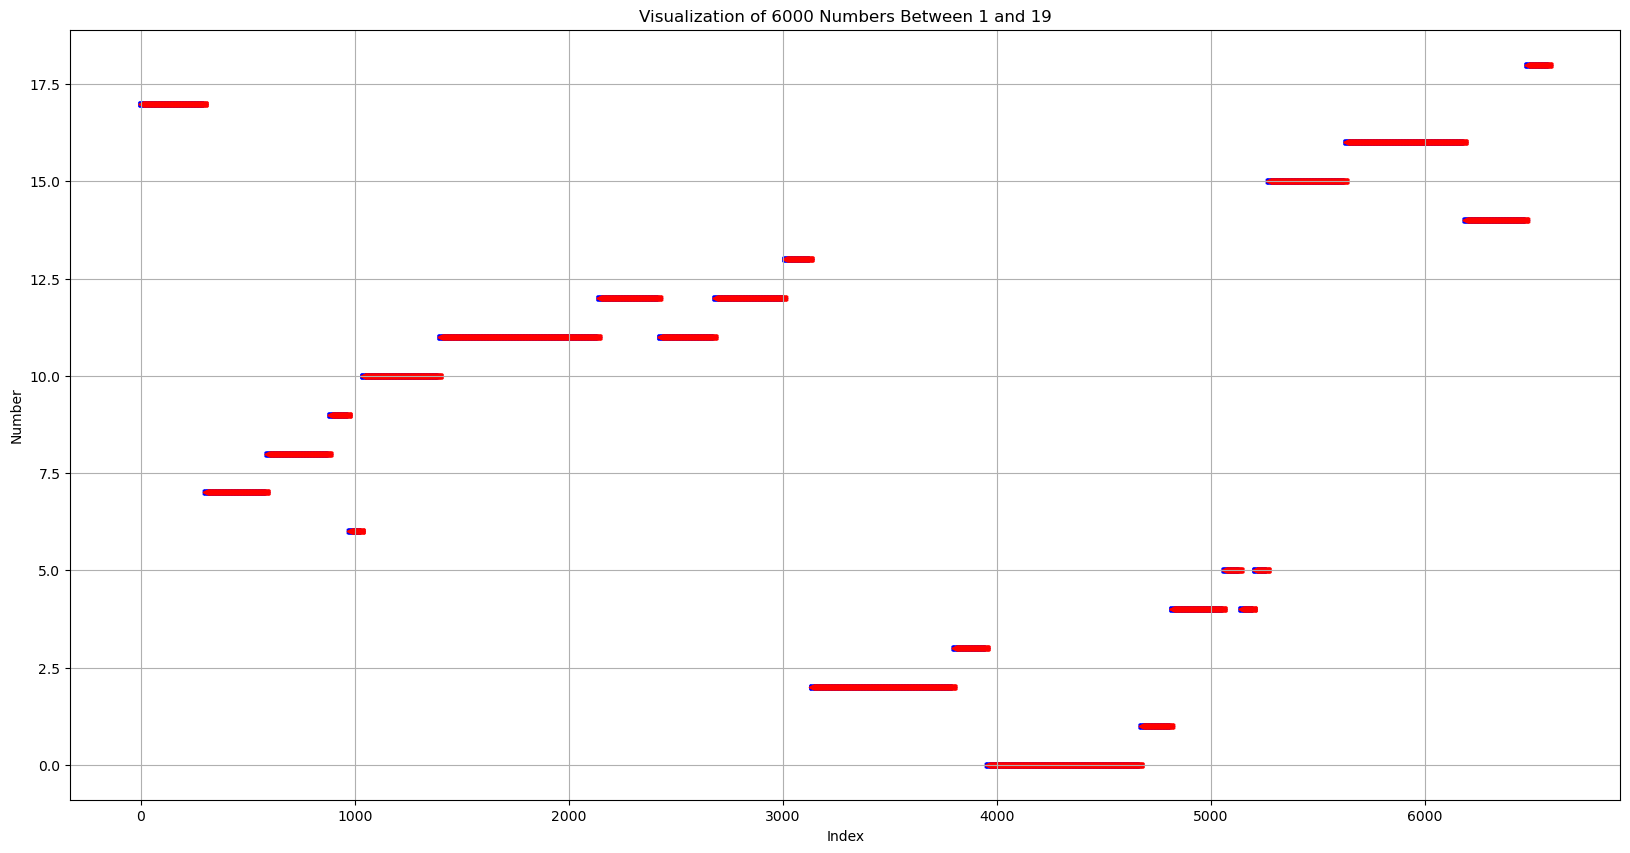

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = x_result[4]
data2 = x_hat_result[4]

plt.figure(figsize=(20, 10))
plt.scatter(range(len(data)), data, marker='>', c='b', s=10)
plt.scatter(range(len(data2)), data2, marker='<', c='r', s=10)

plt.xlabel('Index')
plt.ylabel('Number')
plt.title('Visualization of 6000 Numbers Between 1 and 19')
plt.grid(True)

plt.show()

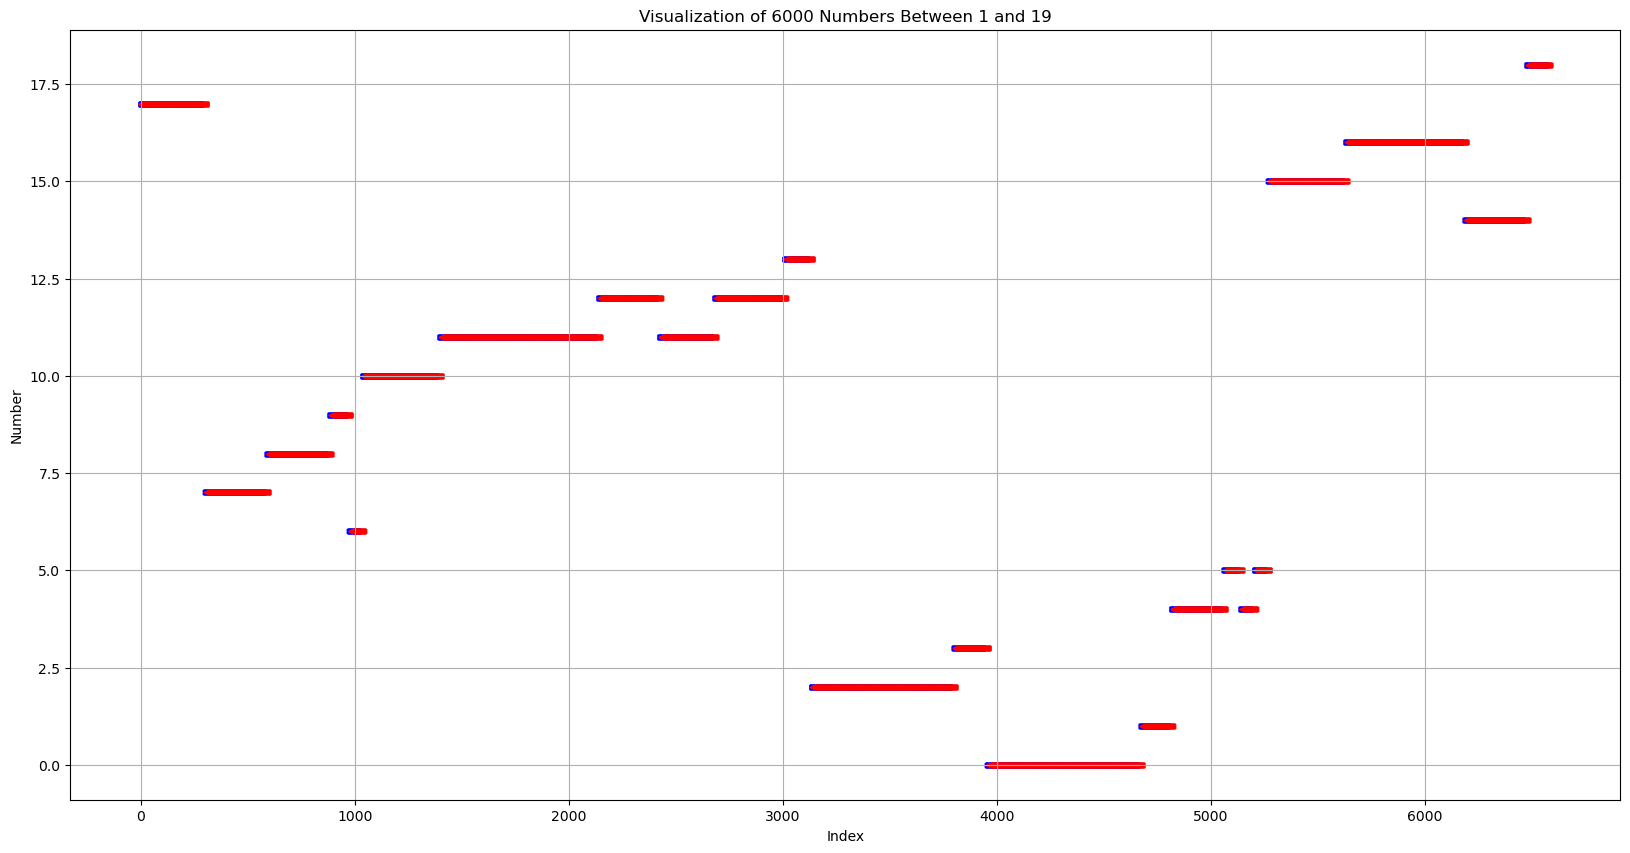

In [12]:
data = x_result[4]
data2 = smooth(x_hat_result[4], l=10, r=0, operation='mode')

plt.figure(figsize=(20, 10))
plt.scatter(range(len(data)), data, marker='>', c='b', s=10)
plt.scatter(range(len(data2)), data2, marker='<', c='r', s=10)

plt.xlabel('Index')
plt.ylabel('Number')
plt.title('Visualization of 6000 Numbers Between 1 and 19')
plt.grid(True)

plt.show()